In [1]:
import numpy as np
import pandas as pd
import ghibtools as gh
import matplotlib.pyplot as plt
from params import *
from configuration import *
from compute_rsa import rsa_job
from bibliotheque import df_baseline
import seaborn as sns

In [2]:
savefolder = base_folder / 'Figures' / 'RSA'

In [3]:
rows_df = []

ncols = len(session_keys)

for sub in subject_keys:
    print(sub)
    
    fig, axs = plt.subplots(ncols = ncols, figsize = (13,5), constrained_layout = True)
    fig.suptitle(f'Heart rate according to respiration phase in {sub}', y = 1.05, fontsize = 20)
    
    for c, session in enumerate(session_keys):
        run_key = f'{sub}_{session}'
        rsa = rsa_job.get(run_key)['rsa']
        phase = rsa.coords['phase'].values
        
        ax = axs[c]

        N = rsa.coords['cycle'].size

        mean_rsa = rsa.mean('cycle')
        rsa_delta =float(np.max(mean_rsa) - np.min(mean_rsa))
        rows_df.append([sub, session, rsa_delta])

        for cycle in rsa.coords['cycle'].values:
            ax.plot(phase, rsa.loc[cycle,:].values, color = 'k', lw = 0.4, alpha = 0.4)
        ax.plot(phase, mean_rsa.values, color = 'orange', lw = 5)
        ax.set_title(f'{session} - N : {N} - RSA : {round(rsa_delta, 2)} bpm') 
        ax.axvline(rsa_params['segment_ratios'], color = 'r')
        ax.set_ylim(30, 120)
        ax.set_ylabel('Heart Beat [bpm]')
        ax.set_xlabel('Respiratory phase')

    fig.savefig(savefolder / 'by_subject' / f'{sub}.png', bbox_inches = 'tight')
    plt.close()
        

P01
P02
P03
P04
P05
P06
P07
P08
P09
P10
P11
P12
P13
P14
P15
P16
P17
P18
P19
P20
P21
P23
P24
P25
P26
P27
P28
P29
P30
P31


In [4]:
df_rsa = pd.DataFrame(rows_df, columns = ['participant','session','rsa_amplitude'])
# df_rsa.to_excel(base_folder / 'Tables' / 'rsa.xlsx')

In [5]:
df_rsa = df_rsa[df_rsa['participant'] != 'P02']

In [6]:
df_rsa

,participant,session,rsa_amplitude
0,P01,baseline,3.326309
1,P01,music,3.396746
2,P01,odor,3.447517
6,P03,baseline,13.242375
7,P03,music,10.198030
...,...,...,...
85,P30,music,3.175661
86,P30,odor,3.901231
87,P31,baseline,5.413651
88,P31,music,5.882433


In [7]:
df_rsa_baseline = df_baseline(df = df_rsa, indexes = ['participant','session'] , metrics = ['rsa_amplitude'])

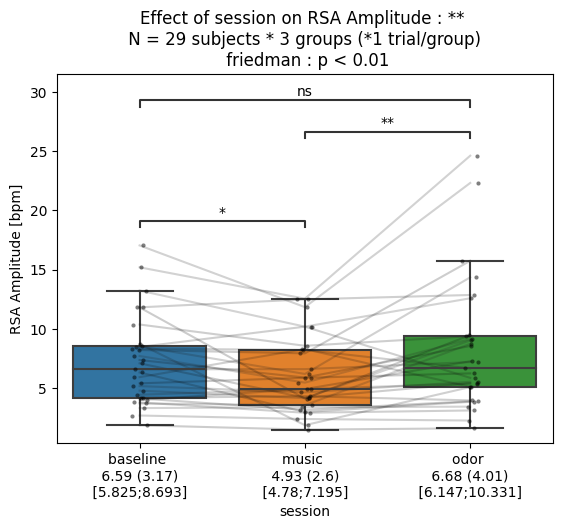

In [8]:
fig, ax = plt.subplots()
gh.auto_stats(df = df_rsa, predictor = 'session', outcome = 'rsa_amplitude', design = 'within', subject = 'participant', ax=ax, outcome_clean_label = 'RSA Amplitude', outcome_unit = 'bpm')
file = savefolder / 'raw_rsa.png'
fig.savefig(file, bbox_inches = 'tight')

In [9]:
df_rsa_baseline

,participant,session,rsa_amplitude
0,P01,odor,1.036439
1,P03,odor,0.950605
2,P04,odor,1.883343
3,P05,odor,1.185396
4,P06,odor,2.354176
5,P07,odor,1.619227
6,P08,odor,1.309203
7,P09,odor,1.070432
8,P10,odor,1.212068
9,P11,odor,1.680854


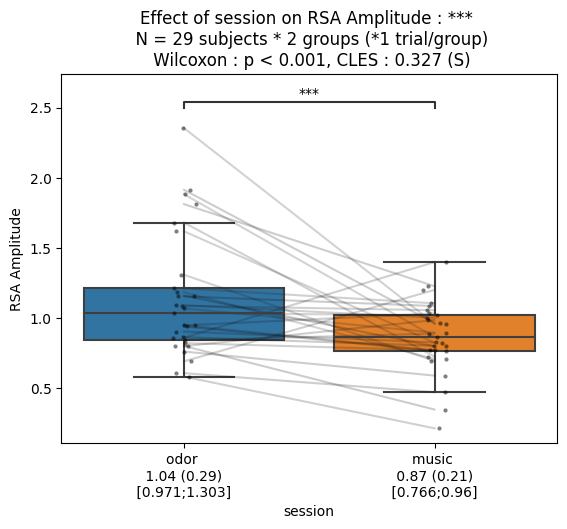

In [10]:
fig, ax = plt.subplots()
gh.auto_stats(df = df_rsa_baseline, predictor = 'session', outcome = 'rsa_amplitude', design = 'within', subject = 'participant', ax=ax, outcome_clean_label = 'RSA Amplitude')
file = savefolder / 'rsa_ratio_to_baseline.png'
fig.savefig(file, bbox_inches = 'tight')